# This script save the video file into .jpeg files

### Dan Luo. CAADRIA 2020 Pre-Workshop
##### http://papers.cumincad.org/data/works/att/caadria2018_083.pdf

## Import library
If there is any library missing, try 'conda install name_of_the_missing_library' in anaconda prompt

In [1]:
import os
import cv2
import numpy as np
from skimage import morphology,data,color
import matplotlib.pyplot as plt
import fnmatch
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Import video file for processing


In [2]:
input_mov='MVI_3010.MOV'   #Input the file name of video clip here
output_dir='all_imgs_test/'+input_mov.split('/')[-1]   #Input the folder path to save processed image
x1,x2,y1,y2=70,380,70,600 #Location to crop the video

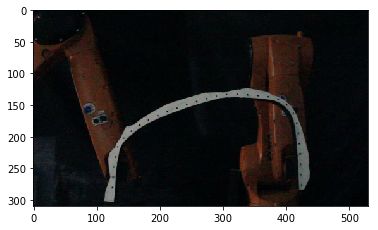

In [13]:
cap = cv2.VideoCapture(input_mov)
success, frame = cap.read()
plt.imshow(frame[x1:x2,y1:y2][:,:,::-1])

#### Extract every 200th frame from the video, and save it into image

In [17]:

def mov2imgs(input_mov):
    output_dir='all_imgs_test'
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    print(input_mov)
    cap = cv2.VideoCapture(input_mov)
    success, frame = cap.read()
    count = 0
    while success:
        if count % 200 == 0: # Extract every 200th frame from the video
            cv2.imwrite(output_dir+'/'+input_mov.split('/')[-1]+str((count//50))+".jpeg",frame[x1:x2,y1:y2])
        success, frame = cap.read()
        count += 1
        if not success:
            break

## ------------------------------------------------------
### Search all videos in the folder

In [18]:
all_movs=[]
root_dir='.'
for root, _, filenames in os.walk(root_dir, followlinks=True):
    for filename in fnmatch.filter(filenames, "*.MOV"):
        all_movs.append(os.path.join(root, filename))
print(all_movs,len(all_movs))

['.\\MVI_3010.MOV'] 1


### Generate images from all videos

In [19]:
for input_mov in all_movs:
    mov2imgs(input_mov)

.\MVI_3010.MOV
